<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Sep29_30/Monte_Carlo_Markov_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [ ]:
file = '/content/drive/MyDrive/Machine_Learning/olympic100m_men.txt'
data = np.loadtxt(file, delimiter = ',').T

In [ ]:
x_n = data[0]
y = data[1]
x = (x_n-1840)/4

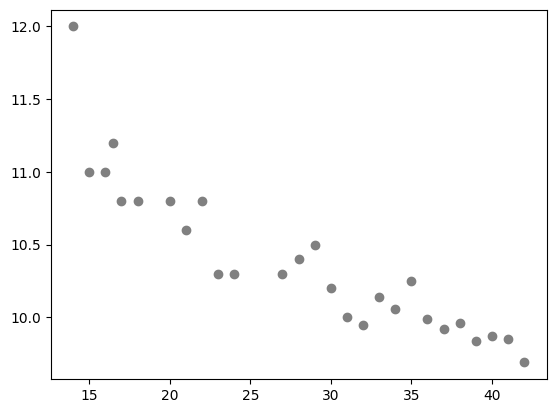

In [ ]:
plt.scatter(x,y, color = 'gray')

In [ ]:
def w_mat(x,y):
  t = y
  X = np.vstack([np.ones_like(x),x]).T
  X_tX = np.matmul(X.T,X)
  invX_tX = np.linalg.inv(X_tX)
  X_t = np.matmul(X.T, t)
  w = np.matmul(invX_tX, X_t)
  return w

In [106]:
x_test = np.linspace(min(x), max(x), 27)
w_test = w_mat(x,y)
print(w_test)
w_test.shape

[11.88762619 -0.05332354]


(2,)

In [108]:
x_test = np.linspace(min(x), max(x), 27)
y_p = w_test[1]+w_test[0]*x_test

In [ ]:
def lnLikelihood(theta):
  L = 0
  for i in range(2):
    L += (y[i]-theta[0]-theta[1]*x[i])**2
  return L

In [ ]:
lnPr = np.zeros(2)
lnPr[0] = np.log(1)
lnPr[1] = np.log(0)
lnPr

<ipython-input-86-2a8f716878b5>:3: RuntimeWarning: divide by zero encountered in log
  lnPr[1] = np.log(0)


array([  0., -inf])

In [112]:
def theta_prop(theta_ini, sigma):
  t_prop = np.zeros(2)
  t_prop[0] = np.exp(theta_ini[0]/sigma**2)
  t_prop[1] = np.exp(theta_ini[1]/sigma**2)
  return t_prop

In [ ]:
theta_ini = w_test
theta_ini

array([11.88762619, -0.05332354])

In [ ]:
logL = lnLikelihood(theta_ini)
logL

0.7454191685433915

In [113]:
t_prop = theta_prop(theta_ini, 1)
t_prop

array([1.45455604e+05, 9.48073221e-01])

In [114]:
logL = lnLikelihood(t_prop)
logL

42315973080.222664